node :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edge: [(0, 2), (0, 3), (0, 4), (0, 8), (1, 2), (1, 3), (1, 5), (1, 6), (1, 9), (2, 5), (2, 8), (2, 9), (3, 5), (3, 6), (3, 7), (4, 9), (6, 9), (7, 8), (7, 9), (8, 9)]


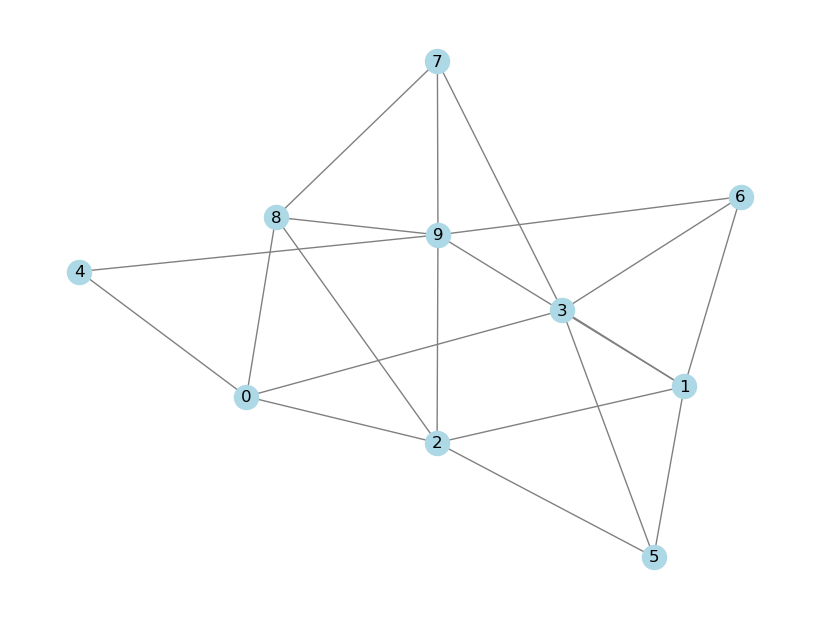

In [16]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

# Küçük graf oluşturma fonksiyonu
def generate_graph(n=250, p=0.4, seed=42):
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, p, seed=seed) #rastgele graf oluştur.
    
    # Graf bağlı mı kontrol et
    if not nx.is_connected(G): #Graf tek parça değilse çalışacak kod.
        components = list(nx.connected_components(G))
        for i in range(len(components)-1): #Parçaları birleştirmek için döngü.
            u = random.choice(list(components[i])) #i'inci component içinden rastgele bir düğüm seçiyor
            v = random.choice(list(components[i+1])) #i+1inci component içinden rastgele bir düğüm seçiyor
            G.add_edge(u, v) # Seçilen u ve v düğümlerini birbirine kenar ekleyerek bağlar.  Böylece graf tek parça (connected) hale gelir
    
    return G
G =generate_graph()
print("node : ",G.nodes())
print("edge:" , G.edges())

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()


In [18]:
def ozellikleri_ata(G):
    for node in G.nodes():
        G.nodes[node]['processing_delay']=round(random.uniform(0.5, 2.0), 2 ) #ms - sonraki 2 sayısı iki ondalik basamağa yuvarla demek
        G.nodes[node]['node_reliability']=round(random.uniform(0.95 ,0.999), 3 )

    for u, v in G.edges():
        G.edges[u, v]['bandwidth']=round(random.uniform(100 , 1000),1)
        G.edges[u, v]['link_delay']=round(random.uniform(3 , 15) , 1)
        G.edges[u, v][ 'link_reliability']=round(random.uniform(0.95 , 0.999),3)

    return G

G=ozellikleri_ata(G)

print("\n Düğümler ve özellikleri:")
for node in G.nodes(data=True): #grafın tüm düğümlerini ve her düğüme atanmış özelliklerini tek tek alır
    print(node)

print("\n Bağlantıalr ve özellikleri:")   
for edge in G.edges(data=True):
    print(edge)


 Düğümler ve özellikleri:
(0, {'processing_delay': 1.46, 'node_reliability': 0.951})
(1, {'processing_delay': 0.91, 'node_reliability': 0.961})
(2, {'processing_delay': 1.6, 'node_reliability': 0.983})
(3, {'processing_delay': 1.84, 'node_reliability': 0.954})
(4, {'processing_delay': 1.13, 'node_reliability': 0.951})
(5, {'processing_delay': 0.83, 'node_reliability': 0.975})
(6, {'processing_delay': 0.54, 'node_reliability': 0.96})
(7, {'processing_delay': 1.47, 'node_reliability': 0.977})
(8, {'processing_delay': 0.83, 'node_reliability': 0.979})
(9, {'processing_delay': 1.71, 'node_reliability': 0.95})

 Bağlantıalr ve özellikleri:
(0, 2, {'bandwidth': 825.2, 'link_delay': 11.4, 'link_reliability': 0.967})
(0, 3, {'bandwidth': 239.9, 'link_delay': 14.5, 'link_reliability': 0.966})
(0, 4, {'bandwidth': 183.5, 'link_delay': 4.2, 'link_reliability': 0.992})
(0, 8, {'bandwidth': 643.4, 'link_delay': 12.7, 'link_reliability': 0.986})
(1, 2, {'bandwidth': 582.6, 'link_delay': 14.7, 'link

In [24]:
def total_delay(path,G):
    delay=0
    for i in range(len(path)-1):
        u=path[i]
        v=path[i+1]

        delay +=G.edges[u,v]['link_delay'] 

    for node in path[1:-1]:
        delay += G.nodes[node]['processing_delay']

    return delay


def reliability_cost(path, G):
    total_cost=0

# Bağlantı güvenilirlik maliyeti
    for i in range(len(path) - 1):
        u = path[i]
        v = path[i+1]
        r = G.edges[u, v]['link_reliability']
        total_cost += -math.log(r)

    for node in path:
        r=G.nodes[node]['node_reliability']
        total_cost += -math.log(r)
    return total_cost


def resource_cost(path,G):
    total_cost=0 
    for i in range(len(path)-1):
        u = path[i]
        v= path[i+1]
        bw=G.edges[u,v]['bandwidth']
        total_cost += 1000 / bw
    return total_cost


def weighted_sum_method(path,G,w_delay=0.33,w_reliability=0.33, w_source=0.34): #önem sırasına göre oranları değiştirebilriz

    td=total_delay(path,G)
    rc=reliability_cost(path,G)
    rct=resource_cost(path,G)
    total=w_delay * td + w_reliability * rc+ w_source * rct
    return total
    



ornek_path = [0, 2] 
print("Örnek path:", ornek_path)

try:
    print("Toplam gecikme:", total_delay(ornek_path, G))
    print("Güvenilirlik maaliyeti:", reliability_cost(ornek_path, G))
    print("Kaynak maaliyeti:", resource_cost(ornek_path, G))

    total_cost = weighted_sum_method(ornek_path, G,
                                            w_delay=0.33,
                                            w_reliability=0.33,
                                            w_source=0.34)
    

    print("Çok amaçlı toplam maliyet:", total_cost)
except Exception as e:
    print("Bir hata oluştu:", e)


Örnek path: [0, 2]
Toplam gecikme: 11.4
Güvenilirlik maaliyeti: 0.10094415880056005
Kaynak maaliyeti: 1.2118274357731458
Çok amaçlı toplam maliyet: 4.207332900567055


In [28]:
# Hücre 4: Örnek bir S-D yolu bul ve metrikleri hesapla

# 1) Kaynak (S) ve hedef (D) düğümlerini seçelim
S = 0
D = 5

print("Seçilen kaynak (S):", S)
print("Seçilen hedef (D):", D)

# 2) Graf üzerinde S'den D'ye bir yol bulalım
try:
    # Kenar sayısına göre en kısa yol (saf topolojik)
    ornek_path = nx.shortest_path(G, source=S, target=D)
    print("Bulunan yol (path):", ornek_path)

    # 3) Metrikleri hesaplayalım
    td=total_delay(ornek_path, G)
    rc=reliability_cost(ornek_path, G)
    rct=resource_cost(ornek_path, G)
    wsm = weighted_sum_method(ornek_path, G,
                                   w_delay=0.33,
                                   w_reliability=0.33,
                                   w_source=0.34)

    print("\n--- Metrikler ---")
    print("Toplam gecikme:", td)
    print("Güvenilirlik maliyeti:", rc)
    print("Kaynak maliyeti:", rct)
    print("Çok amaçlı toplam maliyet:", wsm)

except nx.NetworkXNoPath:
    print(f"{S} ile {D} arasında yol yok, başka S ve D seçmeyi dene.")


Seçilen kaynak (S): 0
Seçilen hedef (D): 5
Bulunan yol (path): [0, 2, 5]

--- Metrikler ---
Toplam gecikme: 23.6
Güvenilirlik maliyeti: 0.15878515849041
Kaynak maliyeti: 4.0673385722665785
Çok amaçlı toplam maliyet: 9.223294216872473
